<a href="https://colab.research.google.com/github/prakash4074/Python/blob/main/Siloutte_and_Kmeans_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/python/Nutrient Composition Dataset.csv'
company_customers_details = pd.read_csv(path)

In [4]:
# creating a copy of the data
data = company_customers_details.copy()

In [5]:
data.head(5)

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [6]:
data.tail(5)

,S.No,Protein,Fat,vitaminC,Fibre,Product
1741,1742,1.188371,1.963861,1.144457,1.438795,Unknown
1742,1743,2.325762,1.970995,1.352002,0.051109,Unknown
1743,1744,0.597130,0.727934,1.031587,0.255496,Unknown
1744,1745,0.748026,1.722406,1.319929,0.920391,Unknown
1745,1746,2.013799,0.576179,0.515998,1.536694,Unknown


In [7]:
data.shape

(1746, 6)

In [8]:
data.isnull().sum()

,0
S.No,0
Protein,0
Fat,0
vitaminC,0
Fibre,0
Product,0


In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No,1746.0,NaN,NaN,NaN,873.5,504.171102,1.0,437.25,873.5,1309.75,1746.0
Protein,1746.0,NaN,NaN,NaN,0.92247,0.627128,0.000128,0.435853,0.813025,1.295106,4.01689
Fat,1746.0,NaN,NaN,NaN,0.900091,0.634617,0.000267,0.394784,0.804687,1.298988,3.979364
vitaminC,1746.0,NaN,NaN,NaN,0.900146,0.623847,0.000029,0.419103,0.79629,1.28087,4.013322
Fibre,1746.0,NaN,NaN,NaN,0.90083,0.626875,0.002579,0.389124,0.820783,1.295732,3.570331
Product,1746,834,Unknown,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# prompt: drop the S.No column
data.info()
data = data.drop(columns=['S.No'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [15]:
# prompt: what is the IQR of the variable protein?

# Calculate the IQR of the 'protein' column
Q1 = data['Protein'].quantile(0.25)
Q3 = data['Protein'].quantile(0.75)
IQR = Q3 - Q1

print(f"The IQR of the 'protein' variable is: {IQR}")


The IQR of the 'protein' variable is: 0.8592526325000001


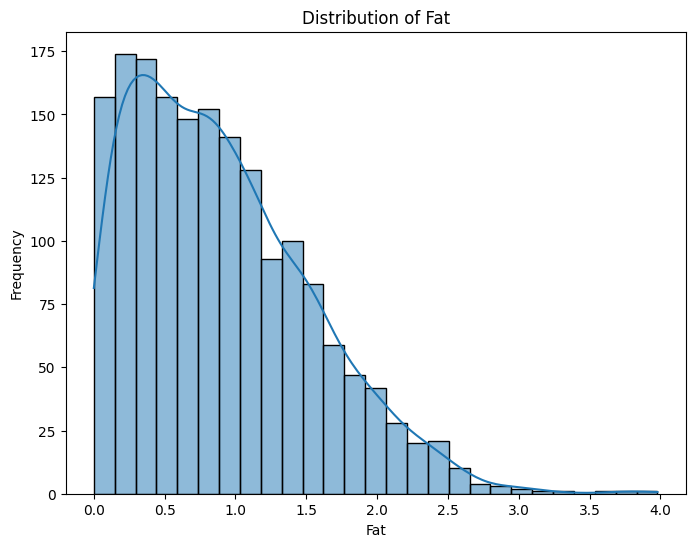

In [16]:
# prompt: create a histogram of the variable fat

import matplotlib.pyplot as plt
# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Fat'], kde=True)  # Use seaborn for better aesthetics
plt.title('Distribution of Fat')
plt.xlabel('Fat')
plt.ylabel('Frequency')
plt.show()


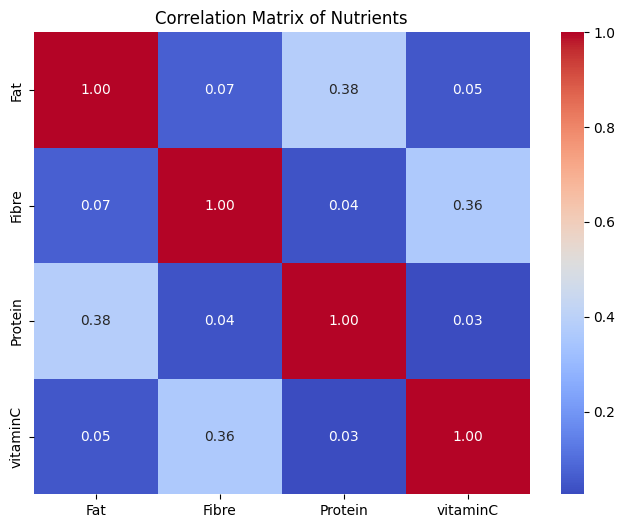

In [17]:
# prompt: create a heat map of fat, fibre, protein and Vitamin C

import matplotlib.pyplot as plt
# Select the relevant columns for the heatmap
nutrients = data[['Fat', 'Fibre', 'Protein', 'vitaminC']]

# Calculate the correlation matrix
correlation_matrix = nutrients.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Nutrients')
plt.show()


In [21]:
# scaling the data before clustering
scaler = StandardScaler()
subset_scaled_df = data.iloc[:, :-1].copy()
subset_scaled_df.iloc[:, :] = scaler.fit_transform(subset_scaled_df.iloc[:, :])
subset_scaled_df.head()



# creating a copy of the scaled dataframe
k_means_df = subset_scaled_df.copy()


# elbow plot
clusters = range(1, 16)
meanDistortions = []

for k in clusters:
  model = KMeans(n_clusters=k, random_state=1)
  model.fit(subset_scaled_df)
  prediction = model.predict(k_means_df)
  distortion = (sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
)

meanDistortions.append(distortion)

print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()


NameError: name 'cdist' is not defined

For n_clusters = 2, the silhouette score is 0.25241844825818016)
For n_clusters = 3, the silhouette score is 0.25457085564593496)
For n_clusters = 4, the silhouette score is 0.20209788371115694)
For n_clusters = 5, the silhouette score is 0.1956911786030402)
For n_clusters = 6, the silhouette score is 0.2071766029811893)
For n_clusters = 7, the silhouette score is 0.2045687931159596)
For n_clusters = 8, the silhouette score is 0.19596389627440364)
For n_clusters = 9, the silhouette score is 0.20117953507818484)
For n_clusters = 10, the silhouette score is 0.20493317387242002)
For n_clusters = 11, the silhouette score is 0.20677161338867206)
For n_clusters = 12, the silhouette score is 0.19776376721094044)
For n_clusters = 13, the silhouette score is 0.19929839529966792)
For n_clusters = 14, the silhouette score is 0.19183239882288844)
For n_clusters = 15, the silhouette score is 0.18876717468712004)


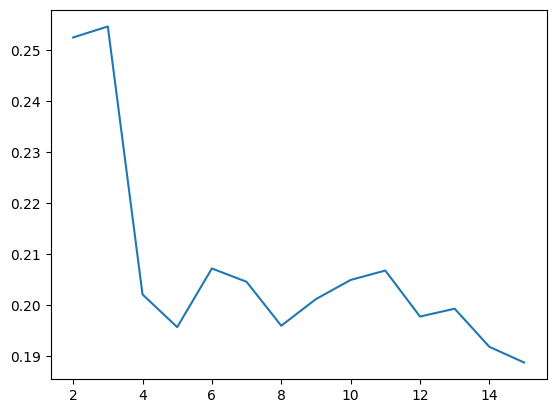

In [23]:
# prompt:  Apply the K means algorithm on the data set. Draw the elbow curve for values of K from 1 to 15

sil_score = []
cluster_list = range(2, 16)
for n_clusters in cluster_list:
 clusterer = KMeans(n_clusters=n_clusters, random_state=1)
 preds = clusterer.fit_predict((subset_scaled_df))
 score = silhouette_score(k_means_df, preds)
 sil_score.append(score)
 print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))
plt.plot(cluster_list, sil_score)
plt.show()
